In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import remove_small_objects
from skimage.measure import label

In [2]:
im_pth = '../test_data/test.png'
im = np.array(Image.open(im_pth))

In [3]:
im.shape

(1943, 6359, 3)

In [57]:
threshold = 200 # threshold for green channel

mask = (im[:,:,1] > threshold).astype(float)
blurred = gaussian_filter(mask, sigma=2)
mask = blurred < 0.70

cc_threshold = 100000 # connected components threshold size (keep above)
mask = remove_small_objects(mask, min_size=cc_threshold)

labeled_mask = label(mask, connectivity=2)

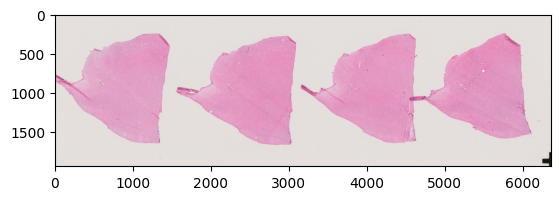

In [54]:
plt.imshow(im)
plt.show()

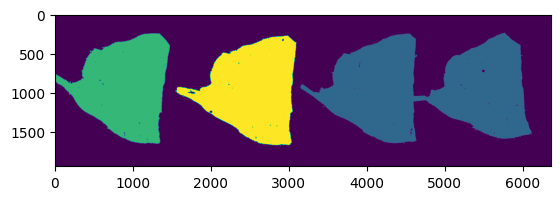

In [58]:
plt.imshow(labeled_mask)
plt.show()

In [59]:
out_im = Image.fromarray(labeled_mask)
out_im.save('test_mask_bad.png')